<a href="https://colab.research.google.com/github/AitorNoel/PontiaProyectoJupiter/blob/main/copia_de_df1206headhunter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar librerias:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nbformat
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '%.2f' % x)


In [ ]:
#Cargar los datos:
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/PONTIA/ESTADÍSTICA/1_modulo_matematico/DF_Completo_hasta_iAviso.csv')

Mounted at /content/drive


In [ ]:
df.head(2)

,Fecha_publicacion,Titulo,Nombre_empresa,Ciudad,Tipo de trabajo,Tipo de contrato,Descripcion,Resumen de lo que piden,Idioma_aviso,Experiencia,Idiomas,Tech_skills,Agile,Herramientas_software,Lenguajes de programación,Salario_minimo,Salario_maximo,Periodo salarial,Jornada,Idioma_aviso_2
0,12/07/2022,Técnico Gestión de la Demanda,Atento España - Estructura,Madrid,Híbrido,Contrato indefinido,-Definición de roles y escenarios\n - Doc...,"Experiencia intermedia, Definición de roles, D...",Español,Experiencia intermedia,No mencionado en la oferta,"Definición de roles y escenarios, Documentació...",No mencionado en la oferta,NaN,NaN,NaN,NaN,NaN,Jornada completa,es
1,12/07/2022,Java - SpringBoot - Proyecto estable - Teletra...,AGIO GLOBAL TECHNOLOGY,Madrid,Teletrabajo,Contrato indefinido,"Desde AgioGlobal Technology, nos encontramos e...","Java, SpringBoot, Microservicios, RestFull, AP...",Español,Senior,NaN,"Java, SpringBoot, Microservicios, RestFull, AP...","Valorable, Scrum",NaN,NaN,40000.00,45000.00,YEAR,Jornada completa,es


In [ ]:
#estructura del DataFrame:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fecha_publicacion          7791 non-null   object 
 1   Titulo                     7791 non-null   object 
 2   Nombre_empresa             7791 non-null   object 
 3   Ciudad                     7790 non-null   object 
 4   Tipo de trabajo            5525 non-null   object 
 5   Tipo de contrato           4647 non-null   object 
 6   Descripcion                7751 non-null   object 
 7   Resumen de lo que piden    7372 non-null   object 
 8   Idioma_aviso               7751 non-null   object 
 9   Experiencia                6976 non-null   object 
 10  Idiomas                    2449 non-null   object 
 11  Tech_skills                7311 non-null   object 
 12  Agile                      2138 non-null   object 
 13  Herramientas_software      1290 non-null   objec

#creación de una nueva columna para insertar ID en cada una de las filas

In [ ]:
# Create a sequence of alphanumeric IDs starting with 'A00000001'
df['ID'] = ['A{:08d}'.format(i) for i in range(1,len(df)+1)]

#colocación de la columna ID al principio de todo

In [ ]:
columns = ['ID'] + [col for col in df if col != 'ID']
df = df[columns]
df.head()

,ID,Fecha_publicacion,Titulo,Nombre_empresa,Ciudad,Tipo de trabajo,Tipo de contrato,Descripcion,Resumen de lo que piden,Idioma_aviso,...,Idiomas,Tech_skills,Agile,Herramientas_software,Lenguajes de programación,Salario_minimo,Salario_maximo,Periodo salarial,Jornada,Idioma_aviso_2
0,A00000001,12/07/2022,Técnico Gestión de la Demanda,Atento España - Estructura,Madrid,Híbrido,Contrato indefinido,-Definición de roles y escenarios\n - Doc...,"Experiencia intermedia, Definición de roles, D...",Español,...,No mencionado en la oferta,"Definición de roles y escenarios, Documentació...",No mencionado en la oferta,NaN,NaN,NaN,NaN,NaN,Jornada completa,es
1,A00000002,12/07/2022,Java - SpringBoot - Proyecto estable - Teletra...,AGIO GLOBAL TECHNOLOGY,Madrid,Teletrabajo,Contrato indefinido,"Desde AgioGlobal Technology, nos encontramos e...","Java, SpringBoot, Microservicios, RestFull, AP...",Español,...,NaN,"Java, SpringBoot, Microservicios, RestFull, AP...","Valorable, Scrum",NaN,NaN,40000.00,45000.00,YEAR,Jornada completa,es
2,A00000003,12/07/2022,Consultor SAP Hana Ingles Alto (Remoto),AIRON Sistemas S.L.,Madrid,Teletrabajo,Contrato indefinido,AirON compañia de innovacion servicios tecnolo...,Experiencia en implantaciones y migraciones en...,Español,...,['Inglés'],Experiencia en implantaciones y migraciones en...,NaN,NaN,NaN,27000.00,30000.00,YEAR,Jornada completa,es
3,A00000004,12/07/2022,ANDROID DEVELOPER. INGLÉS ALTO. 100% REMOTO,MODIS,Madrid,Teletrabajo,Contrato indefinido,Desde MODIS IT consultora GLOBAL especializada...,Experiencia como Android developer con conocim...,Español,...,Inglés,"Principalmente Kotlin, Sift, Unit testing, flo...",NaN,Git,NaN,NaN,NaN,NaN,Jornada completa,es
4,A00000005,12/07/2022,Analista Funcional TEMPORAL,Atento España - Estructura,Madrid,Híbrido,Contrato indefinido,Nuevas aplicaciones/Extensión de la funcionali...,"Experiencia en análisis funcional, integración...",Español,...,NaN,"Análisis funcional de requisitos, integración ...",No se especifica la necesidad de Agile en la o...,Plataforma Atento (posiblemente un software es...,NaN,24000.00,27000.00,YEAR,Jornada completa,es


#conversión todo a minúsculas:

In [ ]:
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df.columns = df.columns.str.lower()

In [ ]:
df.head(1)

,id,fecha_publicacion,titulo,nombre_empresa,ciudad,tipo de trabajo,tipo de contrato,descripcion,resumen de lo que piden,idioma_aviso,...,idiomas,tech_skills,agile,herramientas_software,lenguajes de programación,salario_minimo,salario_maximo,periodo salarial,jornada,idioma_aviso_2
0,a00000001,12/07/2022,técnico gestión de la demanda,atento españa - estructura,madrid,híbrido,contrato indefinido,-definición de roles y escenarios\n - doc...,"experiencia intermedia, definición de roles, d...",español,...,no mencionado en la oferta,"definición de roles y escenarios, documentació...",no mencionado en la oferta,NaN,NaN,NaN,NaN,NaN,jornada completa,es


#eliminacion de columnas que no aportan:


In [ ]:
#aqui eliminamos los espacios vacios por un guion bajo
df.columns = [col.replace(' ', '_') for col in df.columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7791 entries, 0 to 7790
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         7791 non-null   object 
 1   fecha_publicacion          7791 non-null   object 
 2   titulo                     7791 non-null   object 
 3   nombre_empresa             7791 non-null   object 
 4   ciudad                     7790 non-null   object 
 5   tipo_de_trabajo            5525 non-null   object 
 6   tipo_de_contrato           4647 non-null   object 
 7   descripcion                7751 non-null   object 
 8   resumen_de_lo_que_piden    7372 non-null   object 
 9   idioma_aviso               7751 non-null   object 
 10  experiencia                6976 non-null   object 
 11  idiomas                    2449 non-null   object 
 12  tech_skills                7311 non-null   object 
 13  agile                      2138 non-null   objec

In [ ]:
df = df.drop('idioma_aviso_2',axis=1)



In [ ]:
df=df.drop('lenguajes_de_programación',axis=1)

In [ ]:
df.head(1)

,id,fecha_publicacion,titulo,nombre_empresa,ciudad,tipo_de_trabajo,tipo_de_contrato,descripcion,resumen_de_lo_que_piden,idioma_aviso,experiencia,idiomas,tech_skills,agile,herramientas_software,salario_minimo,salario_maximo,periodo_salarial,jornada
0,a00000001,12/07/2022,técnico gestión de la demanda,atento españa - estructura,madrid,híbrido,contrato indefinido,-definición de roles y escenarios\n - doc...,"experiencia intermedia, definición de roles, d...",español,experiencia intermedia,no mencionado en la oferta,"definición de roles y escenarios, documentació...",no mencionado en la oferta,NaN,NaN,NaN,NaN,jornada completa


In [ ]:
#limpieza de datos:
print(df.isnull().sum()) #verificamos valores nulos


id                            0
fecha_publicacion             0
titulo                        0
nombre_empresa                0
ciudad                        1
tipo_de_trabajo            2266
tipo_de_contrato           3144
descripcion                  40
resumen_de_lo_que_piden     419
idioma_aviso                 40
experiencia                 815
idiomas                    5342
tech_skills                 480
agile                      5653
herramientas_software      6501
salario_minimo             6104
salario_maximo             6228
periodo_salarial           4628
jornada                    3144
dtype: int64


#tipo de trabajo y visualización.

tipo_de_trabajo
presencial     2289
híbrido        2057
teletrabajo    1179
Name: count, dtype: int64


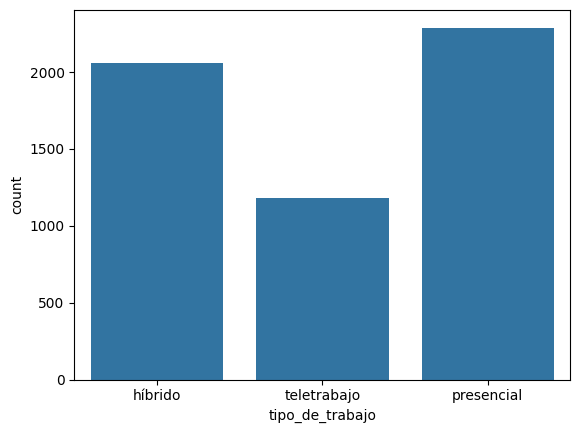

In [ ]:
print(df['tipo_de_trabajo'].value_counts())
sns.countplot(data=df,x='tipo_de_trabajo')
plt.show()

#tipo de trabajo y salario minimo

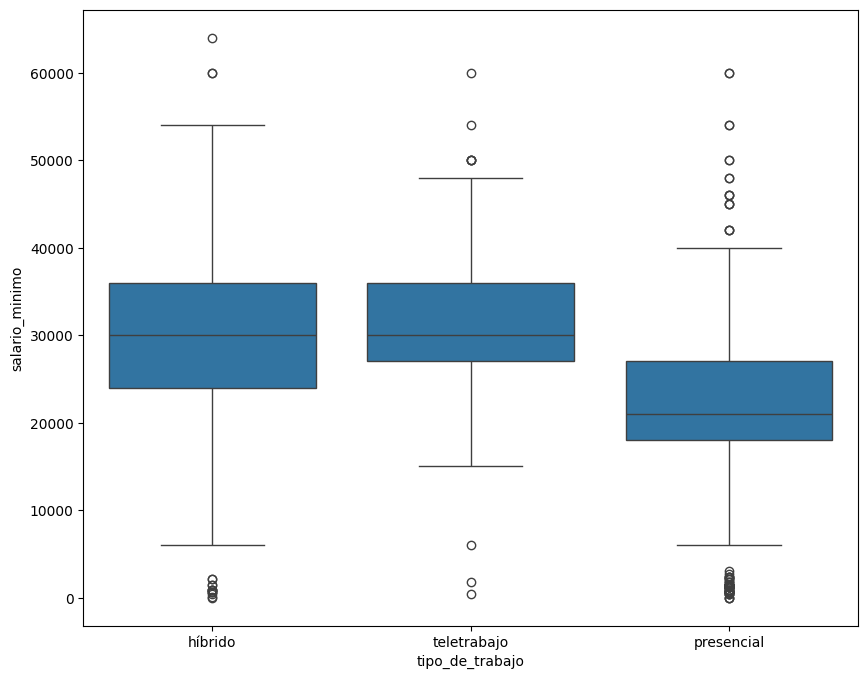

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='tipo_de_trabajo',y='salario_minimo')
plt.show()

#dónde se reclama más talento??

In [ ]:
#Value_counts
value_counts = df[['ciudad']].value_counts()
print(value_counts)
print("la ciudad con mas demanda es:",value_counts.index[0])

ciudad                            
madrid                                2526
barcelona                             1254
madrid, community of madrid, spain     531
barcelona, catalonia, spain            402
spain                                  166
                                      ... 
iurreta                                  1
idiazabal                                1
ibiza, balearic islands, spain           1
huévar del aljarafe                      1
lobón                                    1
Name: count, Length: 601, dtype: int64
la ciudad con mas demanda es: ('madrid',)


#tipo de jornada

In [ ]:
#Value_counts
value_counts = df[['jornada']].value_counts()
print(value_counts)
print("la jornada mas demandada es:",value_counts.index[0])

jornada                        
jornada completa                   4412
jornada indiferente                  87
jornada intensiva - mañana           63
jornada parcial - mañana             36
jornada parcial - indiferente        19
jornada intensiva - indiferente      16
jornada parcial - tarde               7
jornada intensiva - tarde             4
jornada intensiva - noche             3
Name: count, dtype: int64
la jornada mas demandada es: ('jornada completa',)


##CREACION DE NUEVAS COLUMNAS:PYTHON, POWER BI, SQL, TABLEAU

#definimos con una nueva columna si piden PYTHON.

In [ ]:
df['python'] = df.apply(lambda row: 'si' if any('python' in str(cell).lower() for cell in row) else 'no', axis=1)

In [ ]:
df.head()

,id,fecha_publicacion,titulo,nombre_empresa,ciudad,tipo_de_trabajo,tipo_de_contrato,descripcion,resumen_de_lo_que_piden,idioma_aviso,experiencia,idiomas,tech_skills,agile,herramientas_software,salario_minimo,salario_maximo,periodo_salarial,jornada,python
0,a00000001,12/07/2022,técnico gestión de la demanda,atento españa - estructura,madrid,híbrido,contrato indefinido,-definición de roles y escenarios\n - doc...,"experiencia intermedia, definición de roles, d...",español,experiencia intermedia,no mencionado en la oferta,"definición de roles y escenarios, documentació...",no mencionado en la oferta,NaN,NaN,NaN,NaN,jornada completa,no
1,a00000002,12/07/2022,java - springboot - proyecto estable - teletra...,agio global technology,madrid,teletrabajo,contrato indefinido,"desde agioglobal technology, nos encontramos e...","java, springboot, microservicios, restfull, ap...",español,senior,NaN,"java, springboot, microservicios, restfull, ap...","valorable, scrum",NaN,40000.00,45000.00,year,jornada completa,no
2,a00000003,12/07/2022,consultor sap hana ingles alto (remoto),airon sistemas s.l.,madrid,teletrabajo,contrato indefinido,airon compañia de innovacion servicios tecnolo...,experiencia en implantaciones y migraciones en...,español,experiencia intermedia,['inglés'],experiencia en implantaciones y migraciones en...,NaN,NaN,27000.00,30000.00,year,jornada completa,no
3,a00000004,12/07/2022,android developer. inglés alto. 100% remoto,modis,madrid,teletrabajo,contrato indefinido,desde modis it consultora global especializada...,experiencia como android developer con conocim...,español,experiencia de 3 años desarrollando el rol de ...,inglés,"principalmente kotlin, sift, unit testing, flo...",NaN,git,NaN,NaN,NaN,jornada completa,no
4,a00000005,12/07/2022,analista funcional temporal,atento españa - estructura,madrid,híbrido,contrato indefinido,nuevas aplicaciones/extensión de la funcionali...,"experiencia en análisis funcional, integración...",español,experiencia intermedia,NaN,"análisis funcional de requisitos, integración ...",no se especifica la necesidad de agile en la o...,plataforma atento (posiblemente un software es...,24000.00,27000.00,year,jornada completa,no


In [ ]:
value_counts_python = df['python'].value_counts()
print(value_counts_python)

python
no    6997
si     794
Name: count, dtype: int64


#definimos en una nueva columna si piden POWER BI:

In [ ]:
df['powerbi'] = df.apply(lambda row: 'si' if any('powerbi' or 'power bi' in str(cell).lower() for cell in row) else 'no', axis=1)

In [ ]:
value_counts_powerbi = df['powerbi'].value_counts()
print(value_counts_powerbi)
##es raro, por que si escribimos powerbi,  nos salen resultados positivos y negativos, pero si incluimos power bi todos salen positivos???

powerbi
si    7791
Name: count, dtype: int64


In [ ]:

df.head(2)

,id,fecha_publicacion,titulo,nombre_empresa,ciudad,tipo_de_trabajo,tipo_de_contrato,descripcion,resumen_de_lo_que_piden,idioma_aviso,...,idiomas,tech_skills,agile,herramientas_software,salario_minimo,salario_maximo,periodo_salarial,jornada,python,powerbi
0,a00000001,12/07/2022,técnico gestión de la demanda,atento españa - estructura,madrid,híbrido,contrato indefinido,-definición de roles y escenarios\n - doc...,"experiencia intermedia, definición de roles, d...",español,...,no mencionado en la oferta,"definición de roles y escenarios, documentació...",no mencionado en la oferta,NaN,NaN,NaN,NaN,jornada completa,no,si
1,a00000002,12/07/2022,java - springboot - proyecto estable - teletra...,agio global technology,madrid,teletrabajo,contrato indefinido,"desde agioglobal technology, nos encontramos e...","java, springboot, microservicios, restfull, ap...",español,...,NaN,"java, springboot, microservicios, restfull, ap...","valorable, scrum",NaN,40000.00,45000.00,year,jornada completa,no,si


definimos en una nueva columna si piden TABLEAU

In [ ]:
df['tableau'] = df.apply(lambda row: 'si' if any('tableau'  in str(cell).lower() for cell in row) else 'no', axis=1)
df.head(2)

,id,fecha_publicacion,titulo,nombre_empresa,ciudad,tipo_de_trabajo,tipo_de_contrato,descripcion,resumen_de_lo_que_piden,idioma_aviso,...,tech_skills,agile,herramientas_software,salario_minimo,salario_maximo,periodo_salarial,jornada,python,powerbi,tableau
0,a00000001,12/07/2022,técnico gestión de la demanda,atento españa - estructura,madrid,híbrido,contrato indefinido,-definición de roles y escenarios\n - doc...,"experiencia intermedia, definición de roles, d...",español,...,"definición de roles y escenarios, documentació...",no mencionado en la oferta,NaN,NaN,NaN,NaN,jornada completa,no,si,no
1,a00000002,12/07/2022,java - springboot - proyecto estable - teletra...,agio global technology,madrid,teletrabajo,contrato indefinido,"desde agioglobal technology, nos encontramos e...","java, springboot, microservicios, restfull, ap...",español,...,"java, springboot, microservicios, restfull, ap...","valorable, scrum",NaN,40000.00,45000.00,year,jornada completa,no,si,no


In [ ]:
value_counts_tableau = df['tableau'].value_counts()
print(value_counts_tableau)

tableau
no    7521
si     270
Name: count, dtype: int64


In [ ]:
df['sql'] = df.apply(lambda row: 'si' if any('sql' in str(cell).lower() for cell in row) else 'no', axis=1)

In [ ]:
value_counts_sql = df['sql'].value_counts()
print(value_counts_sql)

sql
no    6606
si    1185
Name: count, dtype: int64


In [ ]:
df['analyst'] = df.apply(lambda row: 'si' if any('analyst' in str(cell).lower() for cell in row) else 'no', axis=1)

In [ ]:
value_counts_analyst = df['analyst'].value_counts()
print(value_counts_analyst)

analyst
no    6928
si     863
Name: count, dtype: int64


In [ ]:
df.head(1)

,id,fecha_publicacion,titulo,nombre_empresa,ciudad,tipo_de_trabajo,tipo_de_contrato,descripcion,resumen_de_lo_que_piden,idioma_aviso,...,herramientas_software,salario_minimo,salario_maximo,periodo_salarial,jornada,python,powerbi,tableau,sql,analyst
0,a00000001,12/07/2022,técnico gestión de la demanda,atento españa - estructura,madrid,híbrido,contrato indefinido,-definición de roles y escenarios\n - doc...,"experiencia intermedia, definición de roles, d...",español,...,NaN,NaN,NaN,NaN,jornada completa,no,si,no,no,no


###EDA###

#¿CUANTAS OFERTAS HAY EN EL DATA SET?

In [ ]:
#cantidad de ofertas por titulo:
cantidad_ofertas=df[['titulo']].value_counts()
print(cantidad_ofertas)

titulo                                                            
project manager                                                       85
data analyst                                                          80
data scientist                                                        63
online data analyst                                                   36
senior data scientist                                                 35
                                                                      ..
especialista en medio ambiente                                         1
especialista en informática                                            1
especialista en comunicaciones y ciberseguridad (madrid) - id 8123     1
especialista en ciberseguridad                                         1
全球速卖通事业部(aliexpress) head of transport logistics                       1
Name: count, Length: 6310, dtype: int64


In [ ]:
#cantidad total de ofertas:
cantidad_total_de_ofertas=df.shape[0]
print("el numero total de ofertas es:",cantidad_total_de_ofertas)

el numero total de ofertas es: 7791


#SALARIO MEDIO:

In [ ]:
salario_minimo=df['salario_minimo'].mean()
print(round(salario_minimo),"euros")

26158 euros


In [ ]:
salario_maximo=df['salario_maximo'].mean()
print(round(salario_maximo),"euros")

32438 euros


In [ ]:
salario_medio=(salario_minimo+salario_maximo)/2
print("el salario medio es:",round(salario_medio),"euros")

el salario medio es: 29298 euros


#TRABAJOS MEJOR PAGADOS Y DONDE:

In [ ]:
#trabajo mejor pagado:
indice_max_salario=df['salario_maximo'].idxmax()
trabajo_mejor_pagado=df.loc[indice_max_salario]
print(trabajo_mejor_pagado)

id                                                                 a00000668
fecha_publicacion                                                 07/07/2022
titulo                                                 country manager (esp)
nombre_empresa                                                     hostinger
ciudad                                                             barcelona
tipo_de_trabajo                                                          NaN
tipo_de_contrato                                                         NaN
descripcion                freedom and responsibility to set the directio...
resumen_de_lo_que_piden                                                  NaN
idioma_aviso                                                          inglés
experiencia                                                              NaN
idiomas                                                                  NaN
tech_skills                                                              NaN

In [ ]:
#los 3 mejor pagados
top_3_mejorpagados = df.nlargest(3, 'salario_maximo')[['id','titulo', 'salario_maximo']]
print(top_3_mejorpagados)

             id                    titulo  salario_maximo
667   a00000668     country manager (esp)       100000.00
1933  a00001934  sap co senior consultant       100000.00
3224  a00003225      it business architec        92000.00


#Qué empresas publican los mejores salarios?

In [ ]:
empresas=df.groupby('nombre_empresa')
filtrado=empresas.filter(lambda x: x['salario_maximo'].sum()>29000)
principales_empresas=df['nombre_empresa'].head()
print(principales_empresas)

0    atento españa - estructura
1        agio global technology
2           airon sistemas s.l.
3                         modis
4    atento españa - estructura
Name: nombre_empresa, dtype: object


#DONDE SE DEMANDA MAS TALENTO:

In [ ]:
#donde se demanda mas talento:
lugar_mas_demanda=df['ciudad'].mode()[0]
lugar_mas_demanda

'madrid'

##VISUALS:

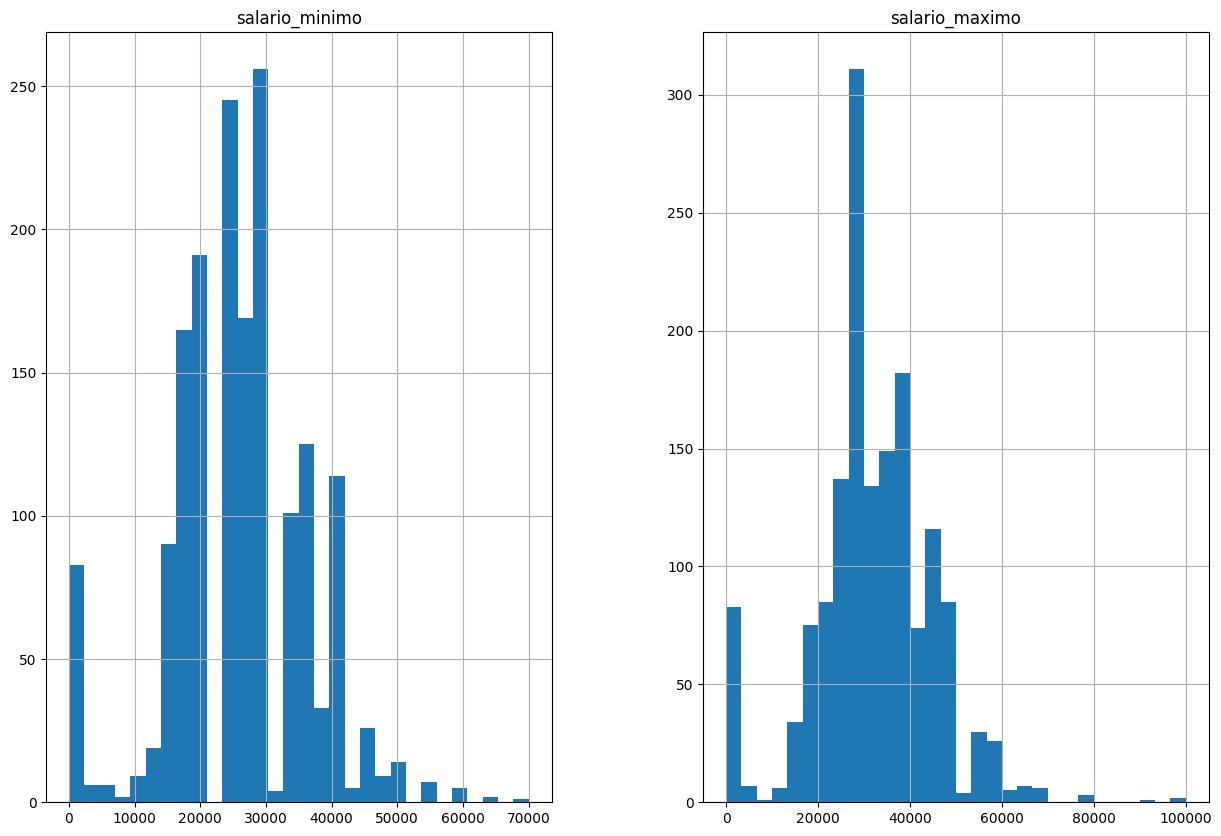

In [ ]:
#visualizamos con histograma:
df.hist(bins=30, figsize=(15,10))
plt.show()

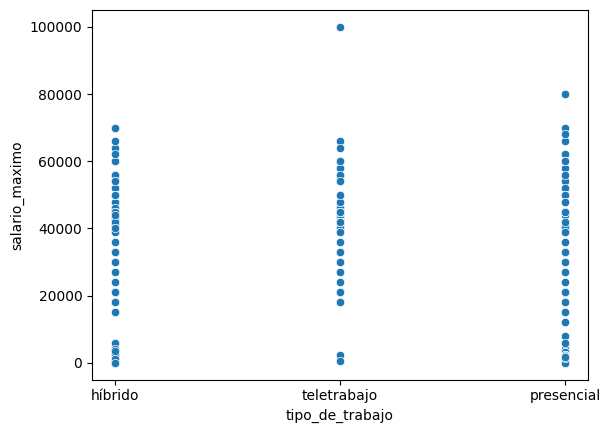

In [ ]:
sns.scatterplot(data=df, x='tipo_de_trabajo', y='salario_maximo',palette=['red', 'pink', 'black'])
plt.show()

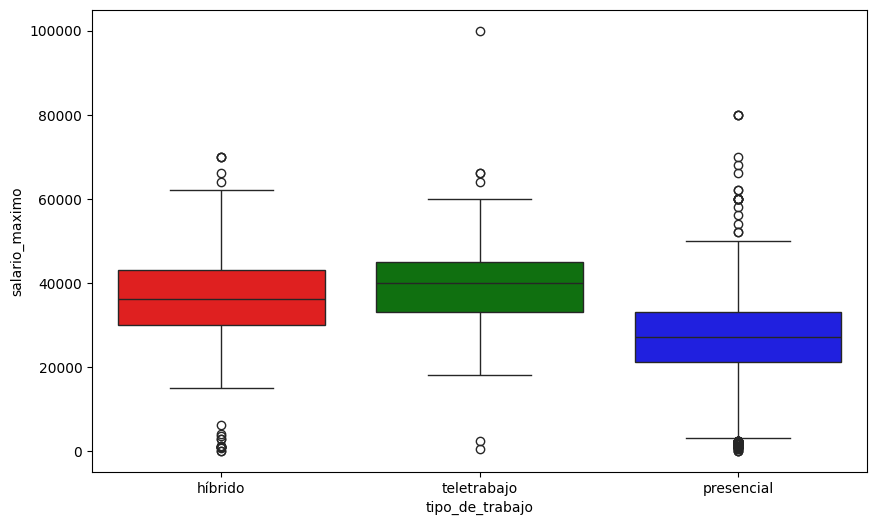

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='tipo_de_trabajo', y='salario_maximo',palette=['red', 'green', 'blue'])
plt.show()

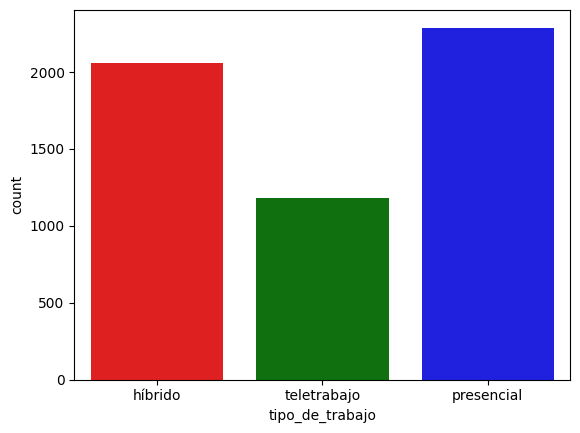

In [ ]:
sns.countplot(data=df, x='tipo_de_trabajo', palette=['red', 'green', 'blue'])
plt.show()

In [ ]:
df.to_csv('DF1206.csv',sep=',', index=False, encoding='utf-8')